In [2]:
from clustimage import Clustimage
import matplotlib.pyplot as plt
import os


[clustimage] >INFO> filepath is set to [/var/folders/y0/y1pptc3n0bjg9j5h8z300x9h0000gn/T/clustimage]
[clustimage] >INFO> filepath is set to [/var/folders/y0/y1pptc3n0bjg9j5h8z300x9h0000gn/T/clustimage]
[clustimage] >INFO> filepath is set to [/var/folders/y0/y1pptc3n0bjg9j5h8z300x9h0000gn/T/clustimage]
100%|██████████| 1/1 [00:00<00:00, 16.88it/s]


<Figure size 432x288 with 0 Axes>

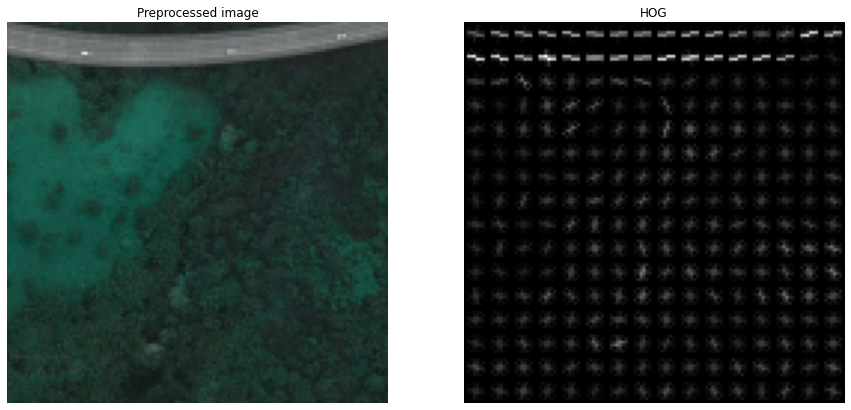

In [48]:
# Initialize
cl = Clustimage()

base_path = './../data/training/images/'
# Load example dataset
images = [os.path.join(base_path, file) for file in os.listdir(base_path) if file.endswith('.png')]

img = cl.imread(images[0], dim=(128,128), colorscale=1, flatten=True)

# Extract HOG features
img_hog = cl.extract_hog(img, pixels_per_cell=(8,8), orientations=8, flatten=False)

# Plot
plt.figure();
fig,axs=plt.subplots(1,2, figsize=(15,10))
axs[0].imshow(img.reshape(128,128,3))
axs[0].axis('off')
axs[0].set_title('Preprocessed image', fontsize=12)
axs[1].imshow(img_hog, cmap='gray')
axs[1].axis('off')
axs[1].set_title('HOG', fontsize=12)
plt.show()

In [49]:
cl = Clustimage(method='pca',
                dim=(125,125),
                params_pca={'n_components':0.90},
                grayscale=False,    

)

results = cl.fit_transform(images,
                           cluster='agglomerative',
                           evaluate='silhouette',
                           metric='cosine',
                           linkage='single',
                           min_clust=4,
                           max_clust=25,
                           cluster_space='high')


[clustimage] >INFO> filepath is set to [/var/folders/y0/y1pptc3n0bjg9j5h8z300x9h0000gn/T/clustimage]
[clustimage] >INFO> filepath is set to [/var/folders/y0/y1pptc3n0bjg9j5h8z300x9h0000gn/T/clustimage]
[clustimage] >INFO> filepath is set to [/var/folders/y0/y1pptc3n0bjg9j5h8z300x9h0000gn/T/clustimage]
[clustimage] >INFO> Cleaning previous fitted model results
[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Reading and checking images.
100%|██████████| 2354/2354 [00:20<00:00, 112.89it/s]
[clustimage] >INFO> Extracting features using method: [pca]


[pca] >Column labels are auto-completed.
[pca] >The PCA reduction is performed to capture [90.0%] explained variance using the [46875] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [823] that covers the [90.00%] explained variance.
[pca] >The PCA reduction is performed on the [46875] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.


[clustimage] >INFO> Extracted features using [pca]: samples=2354, features=823
[clustimage] >INFO> Compute [tsne] embedding
[clustimage] >INFO> Cluster evaluation using the [high] feature space of the [pca] features.



[clusteval] >Fit using agglomerative with metric: cosine, and linkage: single
[clusteval] >Evaluate using silhouette.


100%|██████████| 21/21 [00:02<00:00,  9.34it/s]
[clustimage] >INFO> Updating cluster-labels and cluster-model based on the (2354, 823) feature-space.


[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [4].
[clusteval] >Fin.


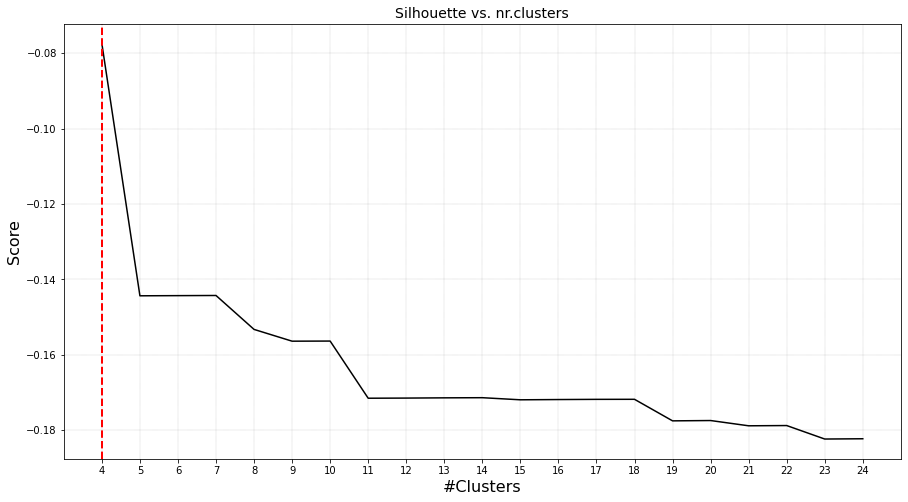

[clusteval] >Estimated number of n_clusters: 4, average silhouette_score=-0.296


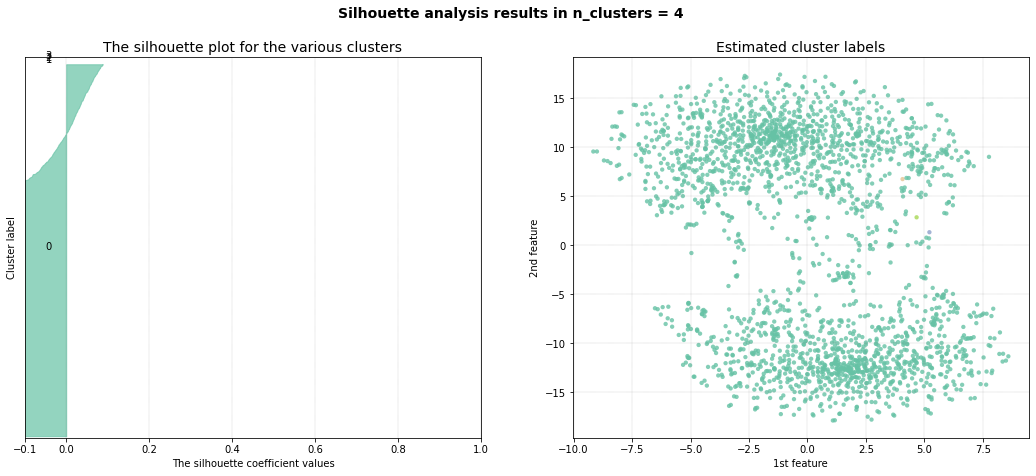

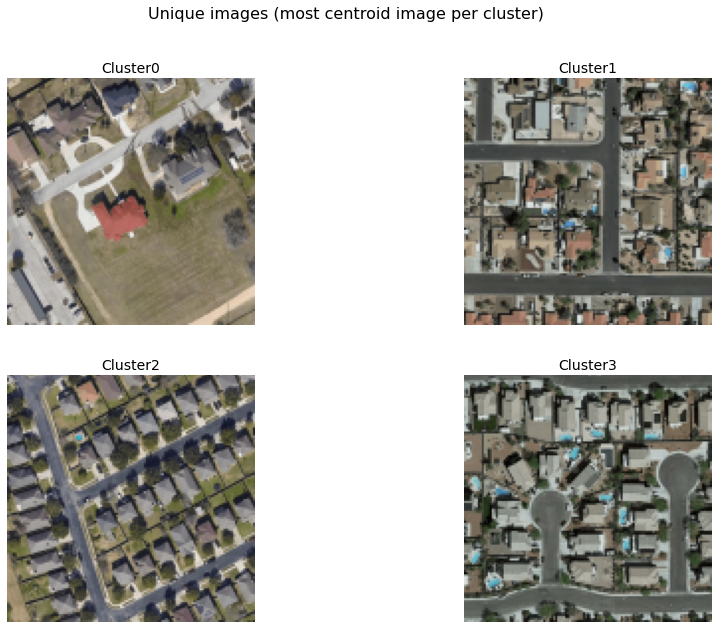

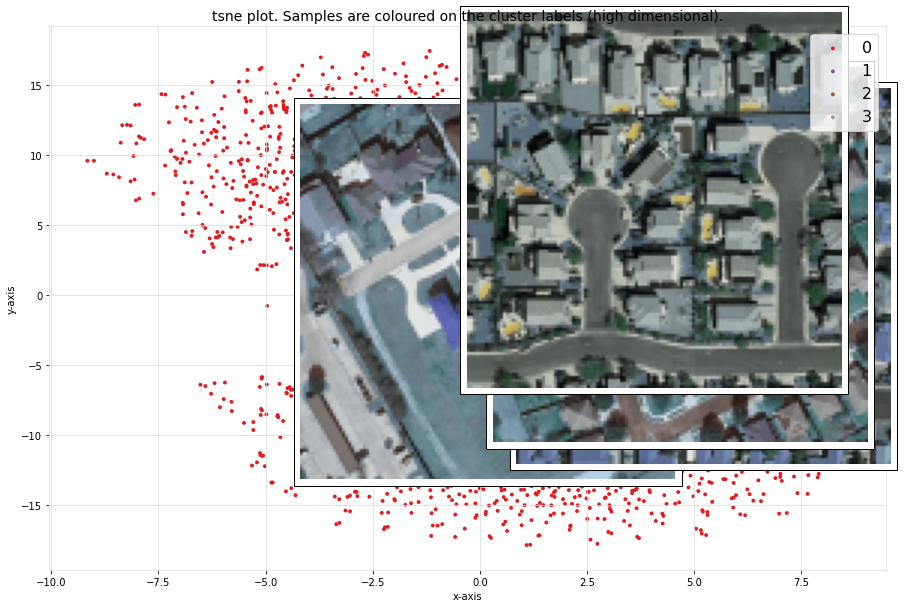

<Figure size 432x288 with 0 Axes>

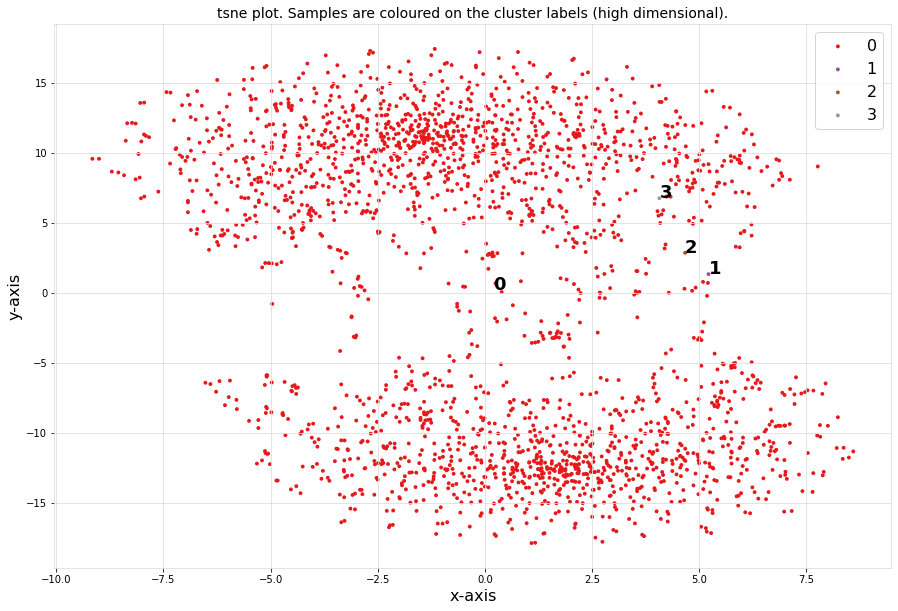

In [50]:
# Silhouette plots
cl.clusteval.plot()
cl.clusteval.scatter(cl.results['xycoord'])

# PCA explained variance plot
#cl.pca.plot()

# Plot unique image per cluster
cl.plot_unique(img_mean=False)

# Scatterplot
cl.scatter(zoom=3, img_mean=False)
cl.scatter(zoom=None, img_mean=False)

# Plot images per cluster or all clusters
cl.plot(cmap='binary', labels=[1,2])
cl.plot(cmap='binary')
